In [62]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import sys
sys.path.append('..') # add parent directory to path
sys.path.append('../../zipline-test/') # add parent directory to path
from datetime import datetime
from helpers.security_loader import load_from_yahoo
import numpy as np
import pandas as pd
from IPython.display import display
from IPython.core.display import HTML
import logging
logging.basicConfig(level=logging.DEBUG)
import statsmodels.api as sm
from rikedom_algorithms.hp_filter import HodrickPrescottAlgorithm
from rikedom import simulator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
today = datetime.today().date()

start = datetime(2014, 6, 2)
end = datetime(today.year, today.month, today.day)
#end = datetime(2015, 7, 15)

OMX_large_cap_portfolio = np.array(open("../index_lists/OMX_Stockholm_Large_Cap_GI.txt").read().splitlines())
OMX30_portfolio = np.array(open("../index_lists/OMX_30.txt").read().splitlines())
cherrypick_portfolio = [
    #'SKF-B.ST', # SKF. industry. beta 1.12
    'AZN.ST', # astra zeneca. medicine
    'VOLV-B.ST', # Volvo. industry. beta 1.54
    'AXFO.ST', # axfood. food. beta 0.48
    #'INVE-B.ST', # investor. property and finance. beta 1.03,
    'SAND.ST', # sandvik. industry. beta 1.21,
    'AAK.ST', # food. 0.63,
    'ALFA.ST', # alfa laval. industry. 1.0
    'ASSAB.ST', # assa abloy (locks). industry. beta 0.89
    'NCC-A.ST', # NCC. construction. 1.22
    'WALL-B.ST', # wallenstam. property. 0.63,
    'STL.OL', #statoil. norwegian. 1,08
    #'^OMX', # stockholm index
    #'BSE-100.BO', # india index.
]
small_portfolio = [
    'NCC-A.ST', # SKF. industry. beta 1.12
    'AZN.ST', # astra zeneca. medicine
]

US_portfolio = [
    'TSLA',
    'MSFT'
]

portfolio = US_portfolio

In [82]:
hp_algo = HodrickPrescottAlgorithm()
hp_algo.run_algorithm(portfolio, start, end)

index_data = load_from_yahoo(stocks=['^omx'], indexes={}, start=start, end=end)
index_performance = index_data['^omx'][-1] / index_data['^omx'][0]*100-100

load_from_yahoo: {'args': (), 'kwargs': {'start': datetime.datetime(2014, 6, 2, 0, 0), 'stocks': ['TSLA', 'MSFT'], 'end': datetime.datetime(2015, 10, 16, 0, 0), 'indexes': {}}}
TSLA
MSFT


In [83]:
for stock_name in portfolio:
    last_date = hp_algo.data[hp_algo.data[stock_name].notnull()].index[-1]
    print '{: <16}{}'.format(stock_name, last_date)

TSLA            2015-10-15 00:00:00+00:00
MSFT            2015-10-15 00:00:00+00:00


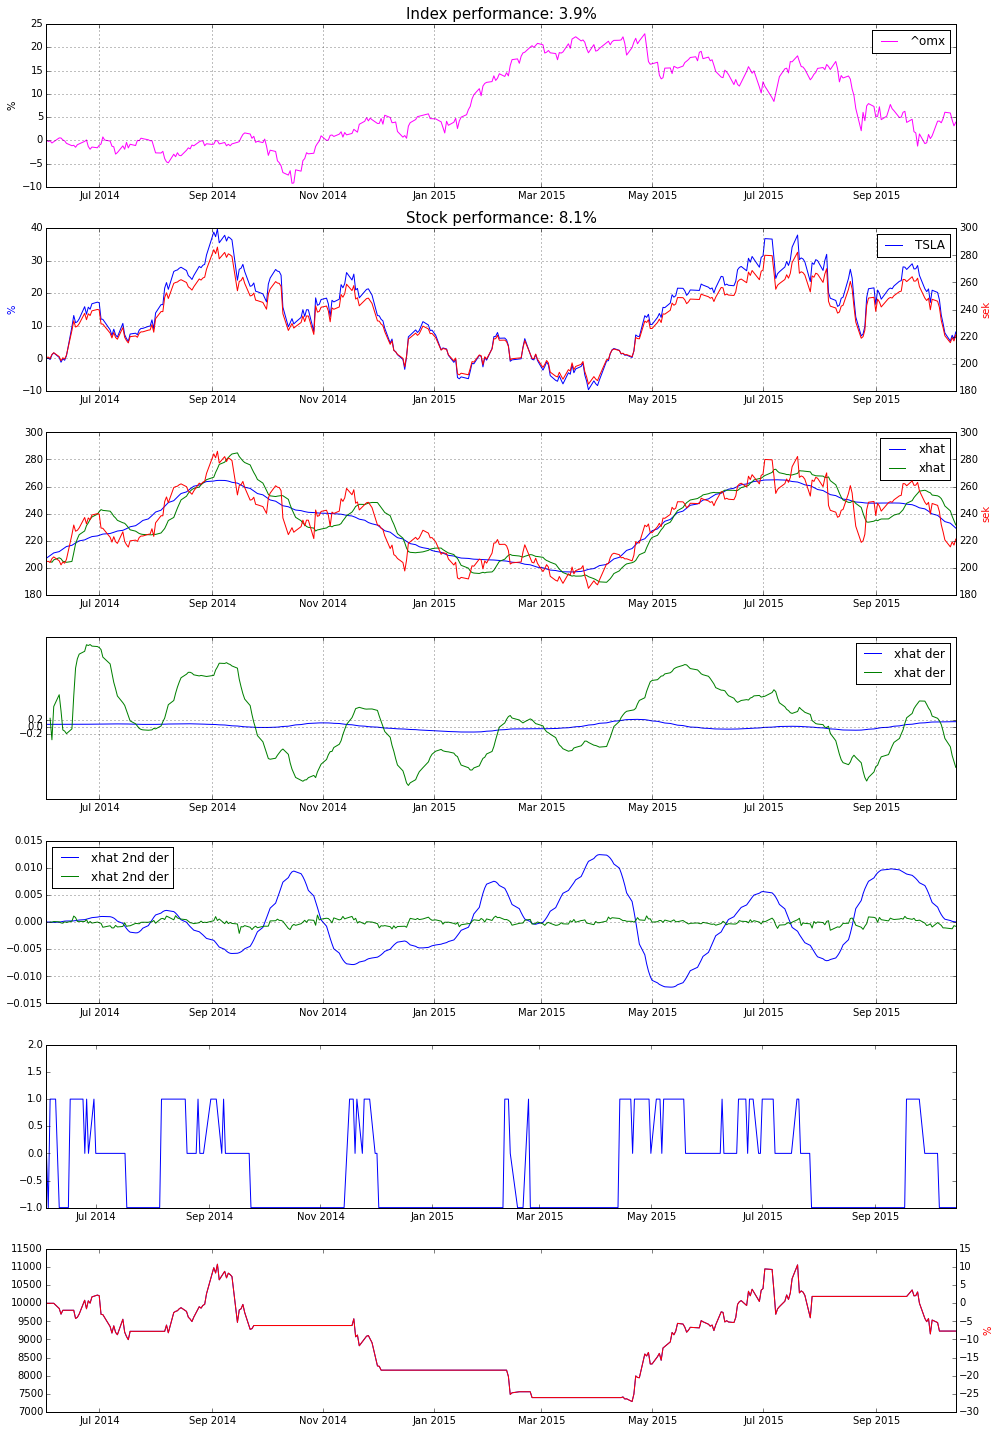

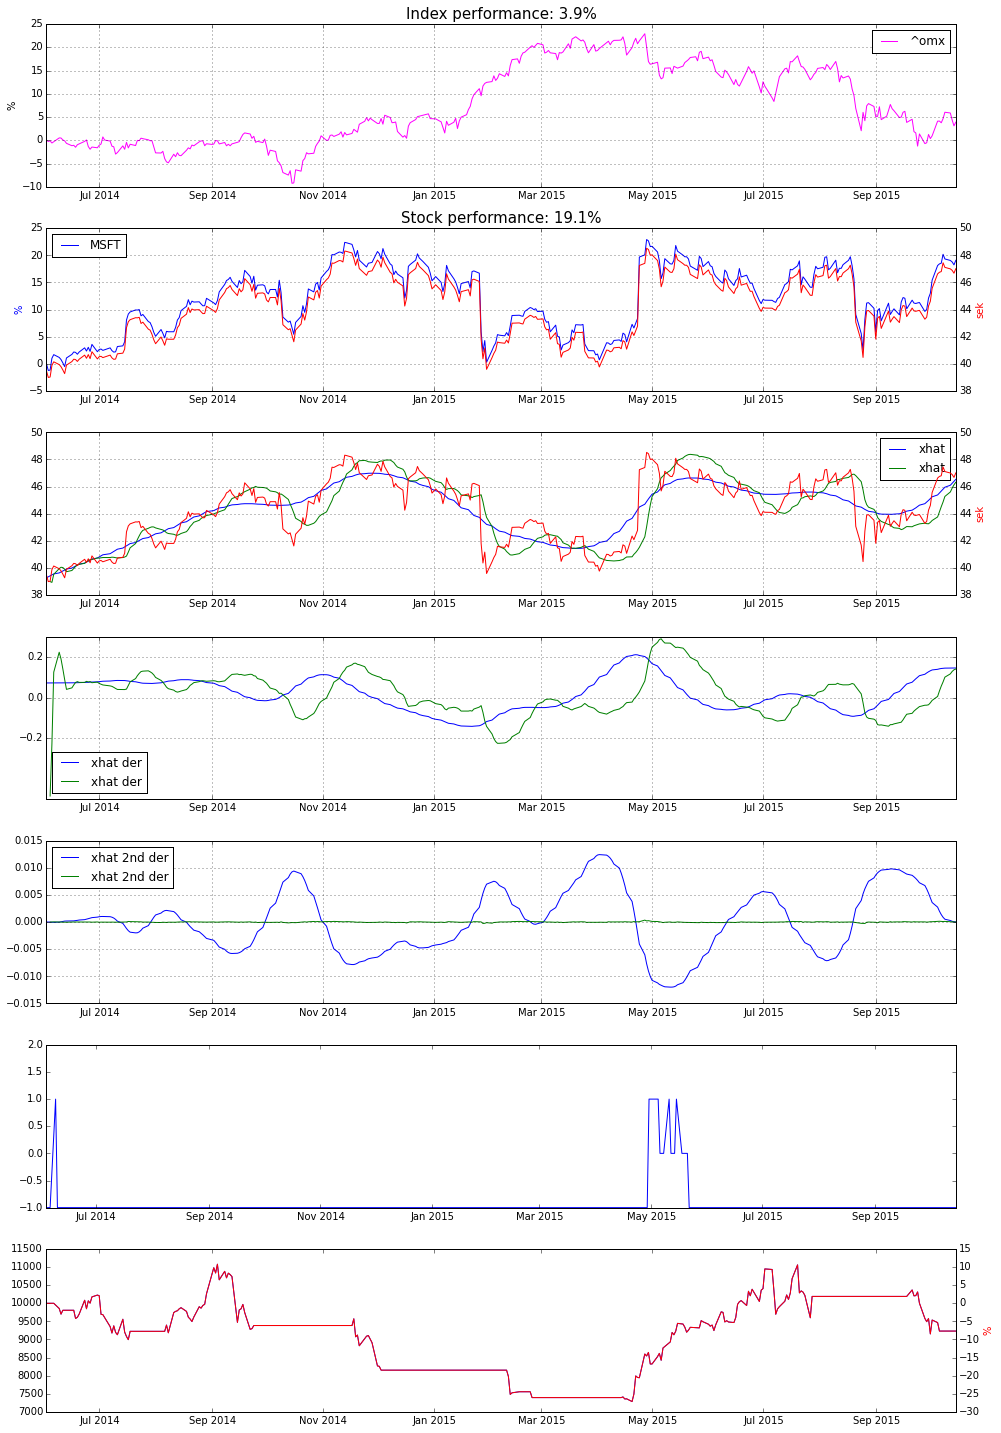

In [84]:




for i, security in enumerate(hp_algo.interesting_stocks):
    display(HTML('<h4>{}</h4>'.format(security)))
    fig = plt.figure(i, figsize=(14,20))
    
    subplot_def = 710

    subplot_def += 1
    ax = fig.add_subplot(subplot_def)
    ax.set_title('Index performance: {:.1f}%'.format(index_performance), fontsize=15)
    ax.set_ylabel('%')
    ax.plot(index_data.index, index_data['^omx']/index_data['^omx'][0]*100-100, color='magenta', label='^omx')
    ax.legend(loc='best')
    ax.grid()

    subplot_def += 1
    stock_performance = hp_algo.data[security][-1] / hp_algo.data[security][0]*100-100
    ax = fig.add_subplot(subplot_def)
    ax.set_title('Stock performance: {:.1f}%'.format(stock_performance), fontsize=15)
    ax.set_ylabel('%', color='blue')
    ax.plot(hp_algo.data.index, hp_algo.data[security] / hp_algo.data[security][0]*100-100, label=security)
    ax.legend(loc='best')
    ax.grid()
    ax2 = ax.twinx()
    ax2.plot(hp_algo.data.index, hp_algo.data[security], color='red')
    ax2.set_ylabel('sek', color='red')

    subplot_def += 1
    ax = fig.add_subplot(subplot_def)
    ax.plot(hp_algo.xhat.index, hp_algo.xhat[security], label='xhat')
    ax.plot(hp_algo.recorder.index, hp_algo.recorder[security+'.xhat'], label='xhat', color='green')
    ax.legend(loc='best')
    ax.grid()
    ax2 = ax.twinx()
    ax2.plot(hp_algo.data.index, hp_algo.data[security], color='red')
    ax2.set_ylabel('sek', color='red')

    subplot_def += 1
    ax = fig.add_subplot(subplot_def)
    ax.plot(hp_algo.xhat.index, hp_algo.derivitative, label='xhat der')
    ax.plot(hp_algo.recorder.index, hp_algo.recorder[security+'.derivitative'], color='green', label='xhat der')
    ax.legend(loc='best')
    ax.grid()
    ax.set_yticks([-0.2, 0, 0.2], minor=False)
    #ax.set_yticks([0.3,0.55,0.7], minor=True)
    ax.yaxis.grid(True, which='major')
    #ax.yaxis.grid(True, which='minor')

    subplot_def += 1
    ax = fig.add_subplot(subplot_def)
    ax.plot(hp_algo.xhat.index, hp_algo.derivitative_2, label='xhat 2nd der')
    ax.plot(hp_algo.recorder.index, hp_algo.recorder[security+'.derivitative_2'], color='green', label='xhat 2nd der')
    ax.legend(loc='best')
    ax.grid()

    subplot_def += 1
    ax = fig.add_subplot(subplot_def)
    ax.plot(hp_algo.buy_sell_hold_signal.index, hp_algo.buy_sell_hold_signal[security+'.buy_sell_hold_signal'])
    ax.set_ylim([-1, 2])

    subplot_def += 1
    worth_percentage = hp_algo.recorder['worth'] / hp_algo.recorder['worth'][0]*100-100
    ax = fig.add_subplot(subplot_def)
    ax.plot(hp_algo.recorder.index, hp_algo.recorder['worth'])
    ax2 = ax.twinx()
    ax2.plot(hp_algo.data.index, worth_percentage, color='red')
    ax2.set_ylabel('%', color='red')

    fig.tight_layout()
    plt.show()